In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json 
import csv
import os
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

In [269]:
dui_2007_df = pd.read_csv("dui2007stats.csv")

dui_2013_df = pd.read_csv("dui2013stats.csv")

census_2007_df = pd.read_csv("Census_output/Census_data_total_2007.csv")

census_2013_df = pd.read_csv("Census_output/Census_data_total_2013.csv")

gender_data_2013_df = pd.read_csv("gender_data_2013.csv")

liar_data_2013_df = pd.read_csv("Liar_data.csv")

Cleaning the Data

In [270]:
dui_2007_df

,Day or Night?_2007,State_2007,Date_2007,From Where_2007,To Where_2007,Trip distance_2007,Alcohol Today_2007,Age Range_2007,Zipcode_2007,Education Level_2007,Employed_2007,Race_2007,Vehicle Type_2007,Gender_2007,Blood Alcohol Content_2007,Student_2007
0,3,TN,11/3/2007,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,0,No
1,1,IL,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,No
2,1,IN,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,0,No
3,1,MI,10/12/2007,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,0,No
4,5,IA,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11115,2,IN,Not answered,Sport or rec facility / park,Home (own home),0 - 5,No,48,46373,Some college,Employed/self-employed,White,Car,1.0,0,No
11116,3,PA,Not answered,Restaurant / eating place,Home (own home),10-Jun,Yes,39,19038,College graduate,Employed/self-employed,White,Car,2.0,Not answered,No
11117,5,FL,Not answered,Other,Home (own home),20-Nov,No,19,33065,Some college,Student,White,Car,2.0,Not answered,Student
11118,1,PA,Not answered,Restaurant / eating place,Home (own home),16 - 20,Not answered,Not answered,19312,College graduate,Retired,White,Car,2.0,Not answered,No


In [271]:
dui_2007_df_no_zero = dui_2007_df[dui_2007_df["Blood Alcohol Content_2007"] != "0"]

In [272]:
dui_2007_df_no_zero

,Day or Night?_2007,State_2007,Date_2007,From Where_2007,To Where_2007,Trip distance_2007,Alcohol Today_2007,Age Range_2007,Zipcode_2007,Education Level_2007,Employed_2007,Race_2007,Vehicle Type_2007,Gender_2007,Blood Alcohol Content_2007,Student_2007
1,1,IL,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,No
4,5,IA,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,No
5,3,NC,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,No
6,3,CA,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,0.064,No
8,4,MA,7/28/2007,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,3,PA,Not answered,Other,Home (own home),20-Nov,Yes,24,19460,High school graduate,Employed/self-employed,White,Car,1.0,0.018,No
11110,4,CA,Not answered,Home (own home),Someone else's home,More than 20,Yes,53,90808,Some college,Employed/self-employed,White,Pickup,1.0,0.008,No
11116,3,PA,Not answered,Restaurant / eating place,Home (own home),10-Jun,Yes,39,19038,College graduate,Employed/self-employed,White,Car,2.0,Not answered,No
11117,5,FL,Not answered,Other,Home (own home),20-Nov,No,19,33065,Some college,Student,White,Car,2.0,Not answered,Student


-------------------------------------------------------------------------------------------------------------------------------

In [273]:
dui_2013_df

,Day or Night?_2013,State_2013,Date_2013,Race_2013,Vehicle Type_2013,From Where_2013,To Where_2013,Trip distance_2013,Alcohol Today_2013,Age Range_2013,Zipcode_2013,Education Level_2013,Employed_2013,Blood Alcohol Content_2013
0,3,CA,12/7/2013 1:36,8,Car,Other,Other,0-5,No,43.0,93003.0,High school graduate,Employed Full-time,Not answered
1,3,CA,12/7/2013 1:56,1,Car,Other,Own home,More than 20,No,21.0,93033.0,Some college - no degree,Employed Full-time,Not answered
2,3,CA,12/7/2013 2:17,8,Car,Other,Own home,0-5,Yes,23.0,93035.0,Some college - no degree,Other __________________________,Not answered
3,3,CA,12/7/2013 2:34,8,Car,Someone else's home,Own home,0-5,No,19.0,93030.0,Some college - no degree,Employed Part-time,0
4,3,CA,12/7/2013 2:41,Not answered,SUV/ Crossover,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11317,4,UT,2/8/2014 23:46,1,Car,Work,Own home,20-Nov,Not answered,56.0,84010.0,Associate's degree,Employed Full-time,0
11318,5,UT,2/9/2014 1:29,1,SUV/ Crossover,Someone else's home,Own home,20-Nov,Not answered,18.0,84054.0,High school graduate,Employed Part-time,0
11319,5,UT,2/9/2014 1:43,1,Car,Someone else's home,Own home,20-Nov,Not answered,22.0,84037.0,Some college - no degree,Employed Part-time,0
11320,5,UT,2/9/2014 2:03,1,Car,Store or gas station,Other,10-Jun,No,20.0,84606.0,Some college - no degree,Employed Part-time,0


In [274]:
dui_2013_df_no_zero = dui_2013_df[dui_2013_df["Blood Alcohol Content_2013"] != "0"]

In [275]:
dui_2013_df_no_zero

,Day or Night?_2013,State_2013,Date_2013,Race_2013,Vehicle Type_2013,From Where_2013,To Where_2013,Trip distance_2013,Alcohol Today_2013,Age Range_2013,Zipcode_2013,Education Level_2013,Employed_2013,Blood Alcohol Content_2013
0,3,CA,12/7/2013 1:36,8,Car,Other,Other,0-5,No,43.0,93003.0,High school graduate,Employed Full-time,Not answered
1,3,CA,12/7/2013 1:56,1,Car,Other,Own home,More than 20,No,21.0,93033.0,Some college - no degree,Employed Full-time,Not answered
2,3,CA,12/7/2013 2:17,8,Car,Other,Own home,0-5,Yes,23.0,93035.0,Some college - no degree,Other __________________________,Not answered
4,3,CA,12/7/2013 2:41,Not answered,SUV/ Crossover,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered
6,1,FL,6/28/2013 9:55,1,SUV/ Crossover,Other,Own home,10-Jun,Not answered,76.0,33174.0,Bachelor's degree,Retired,Not answered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11308,3,UT,2/8/2014 3:09,1,Car,Someone else's home,Own home,20-Nov,Not answered,18.0,84010.0,Some college - no degree,Unemployed,Not answered
11311,4,UT,2/8/2014 22:23,1,Car,Sport or rec facility/park,Own home,More than 20,Not answered,23.0,84302.0,High school graduate,Employed Full-time,Not answered
11312,4,UT,2/8/2014 22:28,Not answered,Car,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered
11316,4,UT,2/8/2014 23:30,6,Car,Work,Own home,0-5,Not answered,17.0,84010.0,9th - 11th grade,Employed Part-time,Not answered


In [276]:
race_key_2013 = dui_2013_df_no_zero.replace({"Race_2013": {"1": "White", "2": "Black", "3": "Asian", "4": "American Indian/Alaska Native", "5": "Native Hawaiian/Other Pacific Islander", "6": "Unknown", "7": "Other", "8": "Two Or More Races", "9": "no response"}})

race_key_2013

,Day or Night?_2013,State_2013,Date_2013,Race_2013,Vehicle Type_2013,From Where_2013,To Where_2013,Trip distance_2013,Alcohol Today_2013,Age Range_2013,Zipcode_2013,Education Level_2013,Employed_2013,Blood Alcohol Content_2013
0,3,CA,12/7/2013 1:36,Two Or More Races,Car,Other,Other,0-5,No,43.0,93003.0,High school graduate,Employed Full-time,Not answered
1,3,CA,12/7/2013 1:56,White,Car,Other,Own home,More than 20,No,21.0,93033.0,Some college - no degree,Employed Full-time,Not answered
2,3,CA,12/7/2013 2:17,Two Or More Races,Car,Other,Own home,0-5,Yes,23.0,93035.0,Some college - no degree,Other __________________________,Not answered
4,3,CA,12/7/2013 2:41,Not answered,SUV/ Crossover,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered
6,1,FL,6/28/2013 9:55,White,SUV/ Crossover,Other,Own home,10-Jun,Not answered,76.0,33174.0,Bachelor's degree,Retired,Not answered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11308,3,UT,2/8/2014 3:09,White,Car,Someone else's home,Own home,20-Nov,Not answered,18.0,84010.0,Some college - no degree,Unemployed,Not answered
11311,4,UT,2/8/2014 22:23,White,Car,Sport or rec facility/park,Own home,More than 20,Not answered,23.0,84302.0,High school graduate,Employed Full-time,Not answered
11312,4,UT,2/8/2014 22:28,Not answered,Car,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered
11316,4,UT,2/8/2014 23:30,Unknown,Car,Work,Own home,0-5,Not answered,17.0,84010.0,9th - 11th grade,Employed Part-time,Not answered


DUI data races:
White, Black/African American, Asian, NativeAmerican/Alaskan, Native Hawaiian/Other Pacific Islander, Unknown, Other, More than one, no response

Census races:
White, Hispanic, Black, American Indian/Alaska Native, Asian, Native Hawaiian/Other Pacific Islander, Two Or More Races,

Matching: 
White, Black, American Indian/Alaska Native, Asian, Native Hawaiian/Other Pacific Islander, Two Or More Races

Not on both:
Hispanic, Unknown, Other, no response

In [277]:
race_key_2013_clean1 = race_key_2013[race_key_2013["Race_2013"] != "Hispanic"]
race_key_2013_clean2 = race_key_2013_clean1[race_key_2013_clean1["Race_2013"] != "Unknown"]
race_key_2013_clean3 = race_key_2013_clean2[race_key_2013_clean2["Race_2013"] != "Other"]
race_key_2013_clean4 = race_key_2013_clean3[race_key_2013_clean3["Race_2013"] != "no response"]
race_key_2013_final = race_key_2013_clean4[race_key_2013_clean4["Race_2013"] != "Not answered"]

race_key_2013_final

,Day or Night?_2013,State_2013,Date_2013,Race_2013,Vehicle Type_2013,From Where_2013,To Where_2013,Trip distance_2013,Alcohol Today_2013,Age Range_2013,Zipcode_2013,Education Level_2013,Employed_2013,Blood Alcohol Content_2013
0,3,CA,12/7/2013 1:36,Two Or More Races,Car,Other,Other,0-5,No,43.0,93003.0,High school graduate,Employed Full-time,Not answered
1,3,CA,12/7/2013 1:56,White,Car,Other,Own home,More than 20,No,21.0,93033.0,Some college - no degree,Employed Full-time,Not answered
2,3,CA,12/7/2013 2:17,Two Or More Races,Car,Other,Own home,0-5,Yes,23.0,93035.0,Some college - no degree,Other __________________________,Not answered
6,1,FL,6/28/2013 9:55,White,SUV/ Crossover,Other,Own home,10-Jun,Not answered,76.0,33174.0,Bachelor's degree,Retired,Not answered
10,1,FL,6/28/2013 11:21,White,Car,Other,Own home,0-5,No,85.0,33125.0,Some college - no degree,Retired,Not answered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11306,3,UT,2/8/2014 2:37,White,Car,Own home,School/church,More than 20,No,23.0,84321.0,Associate's degree,Employed Full-time,Not answered
11307,3,UT,2/8/2014 2:55,White,Car,Someone else's home,Own home,0-5,Not answered,21.0,84010.0,Associate's degree,Unemployed,Not answered
11308,3,UT,2/8/2014 3:09,White,Car,Someone else's home,Own home,20-Nov,Not answered,18.0,84010.0,Some college - no degree,Unemployed,Not answered
11311,4,UT,2/8/2014 22:23,White,Car,Sport or rec facility/park,Own home,More than 20,Not answered,23.0,84302.0,High school graduate,Employed Full-time,Not answered


-------------------------------------------------------------------------------------------------------------------------------

In [278]:
census_2013_df

,Unnamed: 0,State_Census_2013,White_Census_2013,Hispanic_Census_2013,Black_Census_2013,American Indian/Alaska Native_Census_2013,Asian+_Census_2013,Native Hawaiian/Other Pacific Islander_Census_2013,Two Or More Races_Census_2013,Male_Census_2013,Female_Census_2013,Unemployed_Census_2013,Employed,Children 0-18_Census_2013,Adults 19-25_Census_2013,Adults 26-34_Census_2013,Adults 35-54_Census_2013,Adults 55-64_Census_2013,65+_Census_2013,Population_Census_2013
0,0,United States,192379500.0,37122600.0,52764900.0,2008700.0,15505700.0,448800.0,7275400.0,0.49,0.51,31254000.0,264151600.0,76054600.0,28894900.0,37013500.0,83185000.0,39003500.0,43354000.0,316128839.0
1,1,Alabama,3136100.0,1232900.0,184500.0,17900.0,53500.0,NaN,79400.0,0.48,0.52,678000.0,4004400.0,1165900.0,441800.0,533800.0,1246600.0,616200.0,701400.0,4833722.0
2,2,Alaska,441000.0,23600.0,44100.0,97400.0,35500.0,9800.0,53800.0,0.52,0.48,66500.0,638800.0,191600.0,75300.0,96000.0,186900.0,88900.0,66300.0,735132.0
3,3,Arizona,3675000.0,249900.0,1951200.0,250800.0,186000.0,8400.0,144400.0,0.49,0.51,724000.0,5460900.0,1668100.0,615800.0,771600.0,1631200.0,774200.0,1004900.0,6626624.0
4,4,Arkansas,2116100.0,442400.0,197600.0,16200.0,35000.0,NaN,60400.0,0.49,0.51,372900.0,2430900.0,731400.0,255500.0,337700.0,742800.0,363500.0,437700.0,2959373.0
5,5,California,14572300.0,2061400.0,14441900.0,131100.0,5083300.0,123000.0,1098300.0,0.49,0.51,3760700.0,32803500.0,9504300.0,3840800.0,4845800.0,10248700.0,4364000.0,4707700.0,38332521.0
6,6,Colorado,3558300.0,183600.0,1079700.0,23200.0,147000.0,5500.0,132900.0,0.50,0.50,417600.0,4500500.0,1288700.0,484600.0,665600.0,1412000.0,649600.0,629700.0,5268367.0
7,7,Connecticut,2419300.0,333500.0,508100.0,3900.0,141500.0,NaN,72200.0,0.49,0.51,292000.0,2957600.0,816100.0,286200.0,384800.0,994300.0,476200.0,521400.0,3596080.0
8,8,Delaware,577900.0,184300.0,79600.0,2800.0,33700.0,NaN,19900.0,0.48,0.52,88000.0,756500.0,210700.0,78400.0,104800.0,243500.0,119100.0,142100.0,925749.0
9,9,District of Columbia,214500.0,296700.0,63500.0,NaN,19100.0,NaN,15600.0,0.47,0.53,93600.0,539500.0,113800.0,68800.0,126600.0,162500.0,67800.0,70800.0,646449.0


In [279]:
just_states_df = census_2013_df[census_2013_df["State_Census_2013"] != "United States"]

just_states_df = just_states_df[just_states_df["State_Census_2013"] != "Puerto Rico"]

just_states_df

,Unnamed: 0,State_Census_2013,White_Census_2013,Hispanic_Census_2013,Black_Census_2013,American Indian/Alaska Native_Census_2013,Asian+_Census_2013,Native Hawaiian/Other Pacific Islander_Census_2013,Two Or More Races_Census_2013,Male_Census_2013,Female_Census_2013,Unemployed_Census_2013,Employed,Children 0-18_Census_2013,Adults 19-25_Census_2013,Adults 26-34_Census_2013,Adults 35-54_Census_2013,Adults 55-64_Census_2013,65+_Census_2013,Population_Census_2013
1,1,Alabama,3136100.0,1232900.0,184500.0,17900.0,53500.0,NaN,79400.0,0.48,0.52,678000.0,4004400.0,1165900.0,441800.0,533800.0,1246600.0,616200.0,701400.0,4833722.0
2,2,Alaska,441000.0,23600.0,44100.0,97400.0,35500.0,9800.0,53800.0,0.52,0.48,66500.0,638800.0,191600.0,75300.0,96000.0,186900.0,88900.0,66300.0,735132.0
3,3,Arizona,3675000.0,249900.0,1951200.0,250800.0,186000.0,8400.0,144400.0,0.49,0.51,724000.0,5460900.0,1668100.0,615800.0,771600.0,1631200.0,774200.0,1004900.0,6626624.0
4,4,Arkansas,2116100.0,442400.0,197600.0,16200.0,35000.0,NaN,60400.0,0.49,0.51,372900.0,2430900.0,731400.0,255500.0,337700.0,742800.0,363500.0,437700.0,2959373.0
5,5,California,14572300.0,2061400.0,14441900.0,131100.0,5083300.0,123000.0,1098300.0,0.49,0.51,3760700.0,32803500.0,9504300.0,3840800.0,4845800.0,10248700.0,4364000.0,4707700.0,38332521.0
6,6,Colorado,3558300.0,183600.0,1079700.0,23200.0,147000.0,5500.0,132900.0,0.50,0.50,417600.0,4500500.0,1288700.0,484600.0,665600.0,1412000.0,649600.0,629700.0,5268367.0
7,7,Connecticut,2419300.0,333500.0,508100.0,3900.0,141500.0,NaN,72200.0,0.49,0.51,292000.0,2957600.0,816100.0,286200.0,384800.0,994300.0,476200.0,521400.0,3596080.0
8,8,Delaware,577900.0,184300.0,79600.0,2800.0,33700.0,NaN,19900.0,0.48,0.52,88000.0,756500.0,210700.0,78400.0,104800.0,243500.0,119100.0,142100.0,925749.0
9,9,District of Columbia,214500.0,296700.0,63500.0,NaN,19100.0,NaN,15600.0,0.47,0.53,93600.0,539500.0,113800.0,68800.0,126600.0,162500.0,67800.0,70800.0,646449.0
10,10,Florida,10748400.0,2897800.0,4549700.0,39300.0,489900.0,7800.0,360400.0,0.49,0.52,2092100.0,15519600.0,4177900.0,1704900.0,2089500.0,5056300.0,2491100.0,3573500.0,19552860.0


In [280]:
us_headers = ["White","Hispanic","Black","American Indian/Alaska Nativ","Asian","Native Hawaiian/Other Pacific Islander","Two Or More Races"]
us_data = [192379500.0,37122600.0,52764900.0,2008700.0,15505700.0,448800.0,7275400.0,]

us_census_df_2013 = pd.DataFrame(list(zip(us_headers,us_data)), 
                          columns =["Race", "Population"],)
us_census_df_2013

,Race,Population
0,White,192379500.0
1,Hispanic,37122600.0
2,Black,52764900.0
3,American Indian/Alaska Nativ,2008700.0
4,Asian,15505700.0
5,Native Hawaiian/Other Pacific Islander,448800.0
6,Two Or More Races,7275400.0


In [281]:
malevsfemale = ["Male_Census_2013","Female_Census_2013"]
malevsfemaledata = [0.49,0.51]

us_gender_df_2013 = pd.DataFrame(list(zip(malevsfemale,malevsfemaledata)), 
                          columns =['Data', 'val'],)
us_gender_df_2013

,Data,val
0,Male_Census_2013,0.49
1,Female_Census_2013,0.51


In [282]:
us_employment = ["Unemployed_Census_2013","Employed"]
us_employmentdata = [31254000.0,264151600.0]

us_employment_df_2013 = pd.DataFrame(list(zip(us_employment,us_employmentdata)), 
                          columns =['Data', 'val'],)
us_employment_df_2013

,Data,val
0,Unemployed_Census_2013,31254000.0
1,Employed,264151600.0


In [283]:
us_pop_age = ["Children 0-18_Census_2013","Adults 19-25_Census_2013","Adults 26-34_Census_2013","Adults 35-54_Census_2013","Adults 55-64_Census_2013","65+_Census_2013","Population_Census_2013"]
us_pop_agedata = [76054600.0,28894900.0,37013500.0,83185000.0,39003500.0,43354000.0,316128839.0]

us_pop_age_df_2013 = pd.DataFrame(list(zip(us_pop_age,us_pop_agedata)), 
                          columns =['Data', 'val'],)
us_pop_age_df_2013

,Data,val
0,Children 0-18_Census_2013,76054600.0
1,Adults 19-25_Census_2013,28894900.0
2,Adults 26-34_Census_2013,37013500.0
3,Adults 35-54_Census_2013,83185000.0
4,Adults 55-64_Census_2013,39003500.0
5,65+_Census_2013,43354000.0
6,Population_Census_2013,316128839.0


-------------------------------------------------------------------------------------------------------------------------------

What states have the most DUI offenders?

Text(0, 0.5, 'Number')

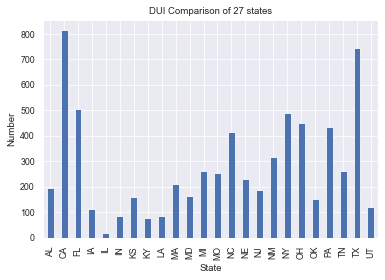

In [284]:
state_count_2013 = dui_2013_df_no_zero.groupby("State_2013")

state_count_2013_data = state_count_2013["State_2013"].count()

ax = state_count_2013_data.plot.bar(title="DUI Comparison of 27 states",)
ax.set_xlabel("State")
ax.set_ylabel("Number")

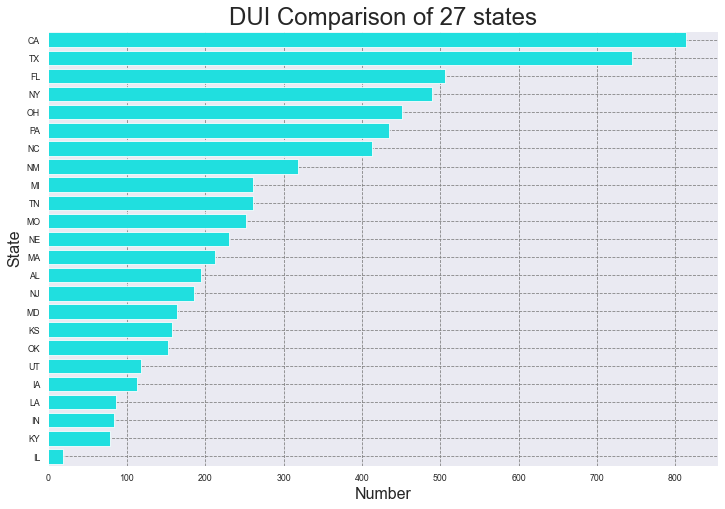

In [285]:


New_DUI = dui_2013_df_no_zero[["State_2013"]]
state_count_2013_dataV =  New_DUI['State_2013'].value_counts().rename_axis('State_2013').reset_index(name='DUI Count')
state_count_2013_dataV

fig = plt.gcf()
fig.set_size_inches(12, 8)

sns.barplot(x = 'DUI Count', y = 'State_2013', data = state_count_2013_dataV, color = 'cyan')
plt.title('DUI Comparison of 27 states', size=24)
plt.xlabel('Number', size=16)
plt.ylabel('State', size=16)
plt.grid (b=True,which='major',axis='both',linestyle='--',color='grey')

plt.show()

Finding the Liars in a new DataFrame

In [286]:
cleaning_liar1 = liar_data_2013_df.dropna(thresh=2)

cleaning_liar2 = cleaning_liar1[cleaning_liar1["Alcohol"] != "0"]

cleaning_liar3 = cleaning_liar2[cleaning_liar2["AlcoholToday"] != "Did not answer"]

liar_final = cleaning_liar3.replace({"AlcoholToday": {"Yes": "Honest Person", "No": "Liar!"}})

liar_final

,AlcoholToday,Alcohol
19,Honest Person,#NULL!
21,Honest Person,0.00018
105,Honest Person,0.00013
111,Liar!,0.00028
147,Honest Person,0.00016
...,...,...
11248,Honest Person,0.00086
11259,Honest Person,0.00063
11280,Honest Person,0.00075
11286,Liar!,0.00047


-------------------------------------------------------------------------------------------------------------------------------

What are gender percent of DUIs?
How does this compare with census population?

In [287]:
gender_data_2013_df

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
11042,Female
11043,Female
11044,Female
11045,Female


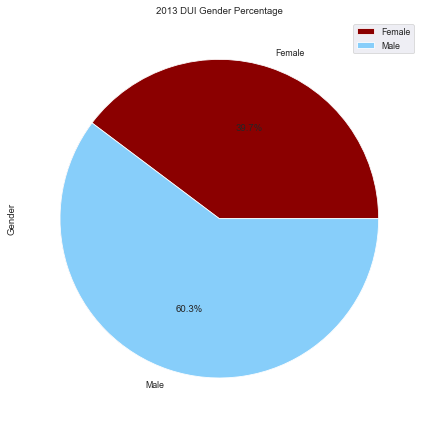

In [288]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

colors = ['darkred', 'lightskyblue',]
pandas_pie_plot = ID_data["Gender"].count()
patches, texts = plt.pie(pandas_pie_plot, colors=colors, shadow=False, startangle=90)
pandas_pie_plot.plot(kind="pie", y="Gender", title="2013 DUI Gender Percentage",autopct="%1.1f%%",colors=colors)
plt.tight_layout()
plt.legend(patches, labels, loc="best")



In [289]:
us_gender_df_2013

,Data,val
0,Male_Census_2013,0.49
1,Female_Census_2013,0.51


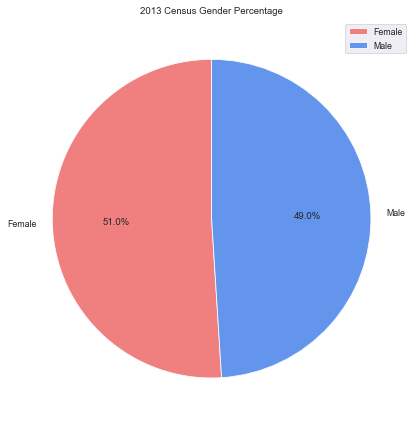

In [290]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))
colors = ['lightcoral', 'cornflowerblue',]

slices = [0.51,0.49]
labels = ["Female", "Male"]
patches, texts = plt.pie(pandas_pie_plot, colors=colors, shadow=False, startangle=90)
plt.pie(slices,colors = colors, labels=labels,autopct="%1.1f%%",startangle=90)
plt.title("2013 Census Gender Percentage")
plt.tight_layout()
plt.legend(patches, labels, loc="best")



-------------------------------------------------------------------------------------------------------------------------------

How do census demographics compare to DUI demographic statistics?

In [291]:
dui_race_data = race_key_2013_final.groupby("Race_2013")

dui_race_plot = dui_race_data["Race_2013"].count()

dui_race_plot

Race_2013
American Indian/Alaska Native               46
Asian                                      187
Black                                      679
Native Hawaiian/Other Pacific Islander      21
Two Or More Races                          351
White                                     2772
Name: Race_2013, dtype: int64

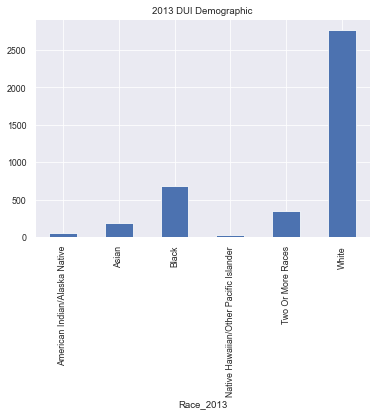

In [292]:
dui_race_plot.plot(kind="bar",x="Count", y="Race",title="2013 DUI Demographic")

In [293]:
us_census_df_2013_matching = us_census_df_2013[us_census_df_2013["Race"] != "Hispanic"]

us_census_df_2013_matching 

,Race,Population
0,White,192379500.0
2,Black,52764900.0
3,American Indian/Alaska Nativ,2008700.0
4,Asian,15505700.0
5,Native Hawaiian/Other Pacific Islander,448800.0
6,Two Or More Races,7275400.0


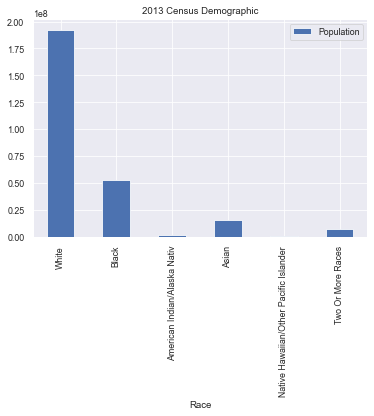

In [294]:
us_census_df_2013_matching.plot(kind="bar", x="Race", y="Population",title="2013 Census Demographic")

In [295]:
New_race = race_key_2013_final[["Race_2013"]]
state_count_2013_dataP = New_race['Race_2013'].value_counts().rename_axis('Race_2013').reset_index(name='Population')
state_count_2013_dataP

,Race_2013,Population
0,White,2772
1,Black,679
2,Two Or More Races,351
3,Asian,187
4,American Indian/Alaska Native,46
5,Native Hawaiian/Other Pacific Islander,21


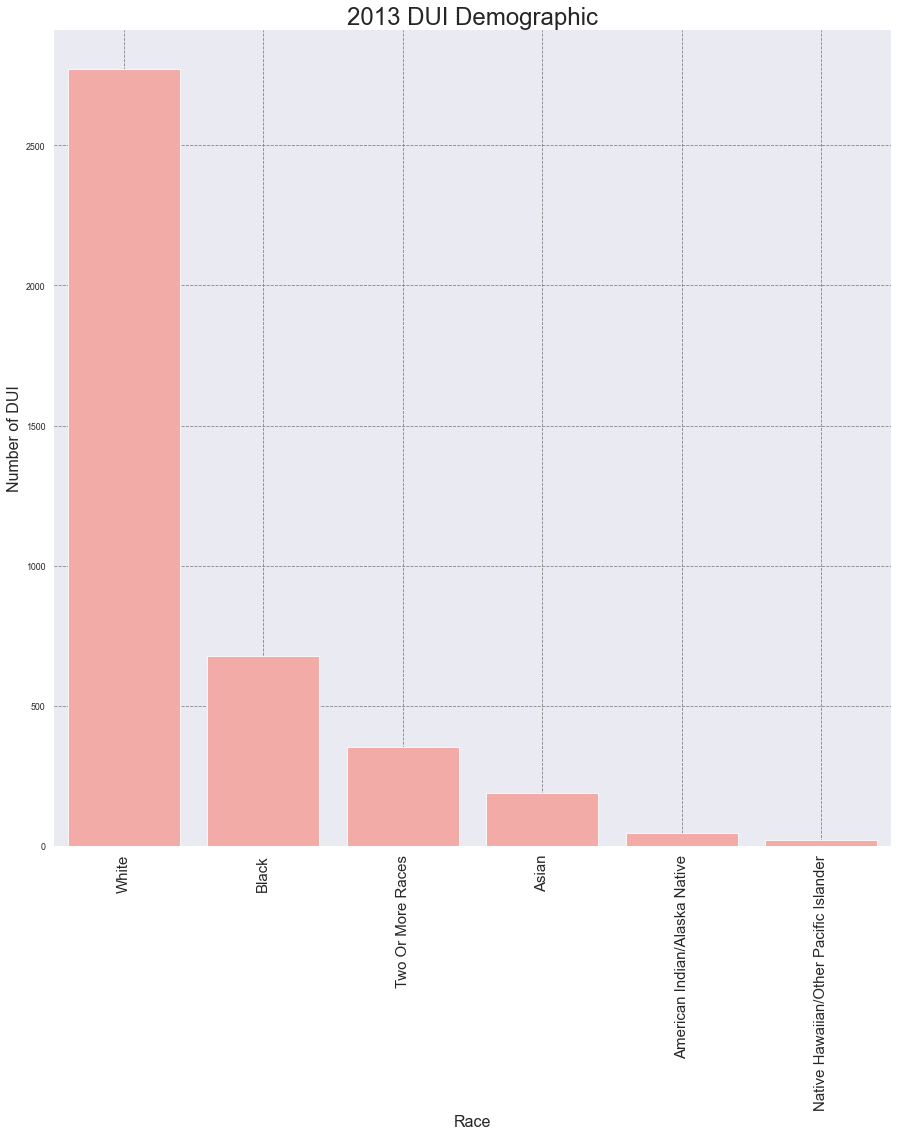

In [312]:
sns.set_context('paper')

New_race = race_key_2013_final[["Race_2013"]]
state_count_2013_dataP = New_race['Race_2013'].value_counts().rename_axis('Race_2013').reset_index(name='Population')
state_count_2013_dataP

f, ax = plt.subplots(figsize = (15,15))
sns.set_color_codes('pastel')
ax = sns.barplot(x = 'Race_2013', y = 'Population', data = state_count_2013_dataP,
            label = 'Alcohol-involved', color = 'r', edgecolor = 'w')
plt.grid (b=True,which='major',axis='both',linestyle='--',color='grey')
plt.title('2013 DUI Demographic', size=24)
plt.xlabel('Race', size=16)
plt.ylabel('Number of DUI', size=16)
sns.despine(left = True, top = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, size = 15)
plt.show()

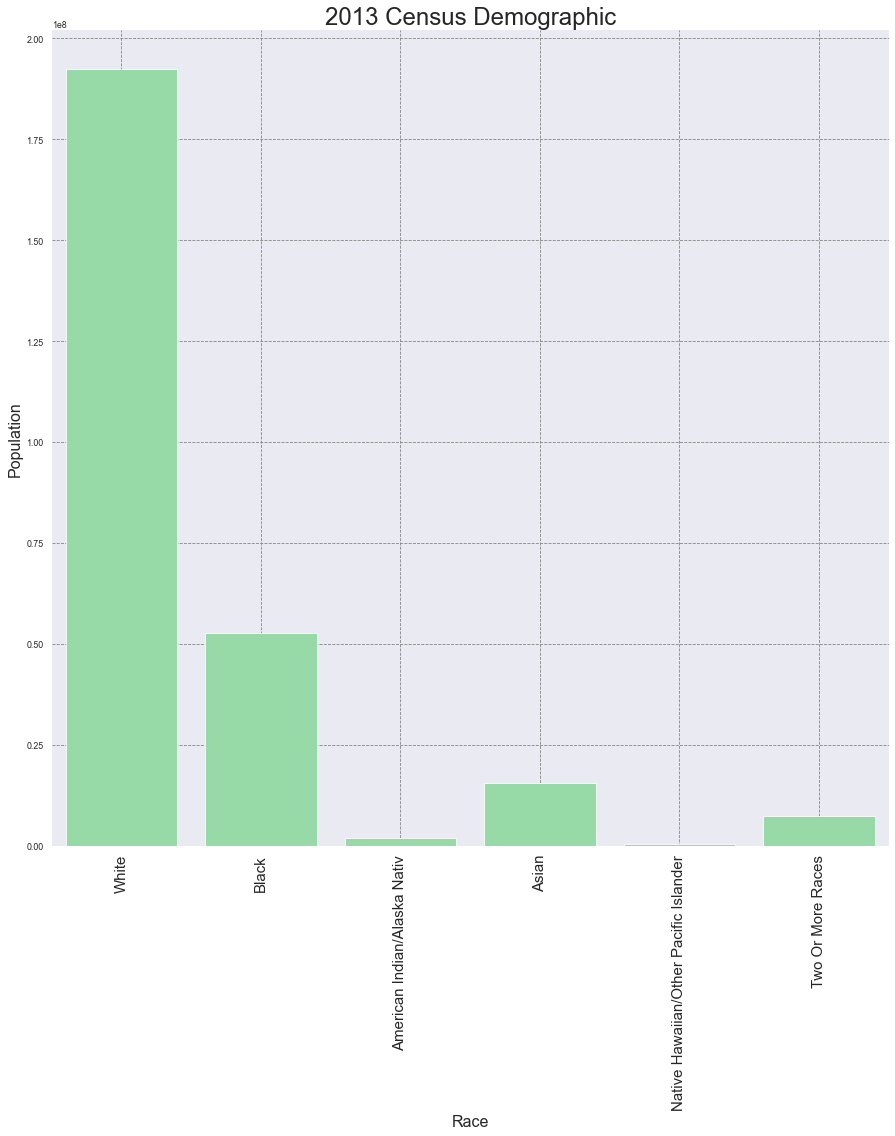

In [311]:
sns.set_context('paper')

f, ax = plt.subplots(figsize = (15,15))
sns.set_color_codes('pastel')
ax = sns.barplot(x = 'Race', y = 'Population', data = us_census_df_2013_matching,
            label = 'Alcohol-involved', color = 'g', edgecolor = 'w')
plt.grid (b=True,which='major',axis='both',linestyle='--',color='grey')
plt.title('2013 Census Demographic', size=24)
plt.xlabel('Race', size=16)
plt.ylabel('Population', size=16)
sns.despine(left = True, top = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, size = 15)

plt.show()

-------------------------------------------------------------------------------------------------------------------------------
Data for the rest of the plots

In [298]:
dui_2013_df_no_zero

,Day or Night?_2013,State_2013,Date_2013,Race_2013,Vehicle Type_2013,From Where_2013,To Where_2013,Trip distance_2013,Alcohol Today_2013,Age Range_2013,Zipcode_2013,Education Level_2013,Employed_2013,Blood Alcohol Content_2013
0,3,CA,12/7/2013 1:36,8,Car,Other,Other,0-5,No,43.0,93003.0,High school graduate,Employed Full-time,Not answered
1,3,CA,12/7/2013 1:56,1,Car,Other,Own home,More than 20,No,21.0,93033.0,Some college - no degree,Employed Full-time,Not answered
2,3,CA,12/7/2013 2:17,8,Car,Other,Own home,0-5,Yes,23.0,93035.0,Some college - no degree,Other __________________________,Not answered
4,3,CA,12/7/2013 2:41,Not answered,SUV/ Crossover,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered
6,1,FL,6/28/2013 9:55,1,SUV/ Crossover,Other,Own home,10-Jun,Not answered,76.0,33174.0,Bachelor's degree,Retired,Not answered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11308,3,UT,2/8/2014 3:09,1,Car,Someone else's home,Own home,20-Nov,Not answered,18.0,84010.0,Some college - no degree,Unemployed,Not answered
11311,4,UT,2/8/2014 22:23,1,Car,Sport or rec facility/park,Own home,More than 20,Not answered,23.0,84302.0,High school graduate,Employed Full-time,Not answered
11312,4,UT,2/8/2014 22:28,Not answered,Car,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered,Not answered
11316,4,UT,2/8/2014 23:30,6,Car,Work,Own home,0-5,Not answered,17.0,84010.0,9th - 11th grade,Employed Part-time,Not answered


-------------------------------------------------------------------------------------------------------------------------------

Where were most people headed to/from?

In [299]:
from2013_data

From Where_2013
Bar, tavern, club              159
Did not answer                   6
Hotel/motel                     30
Not answered                  2455
Other                          562
Own home                       971
Restaurant/eating place        424
School/church                  117
Someone else's home            832
Sport or rec facility/park     191
Store or gas station           197
Work                           795
Name: From Where_2013, dtype: int64

Text(0, 0.5, 'Number')

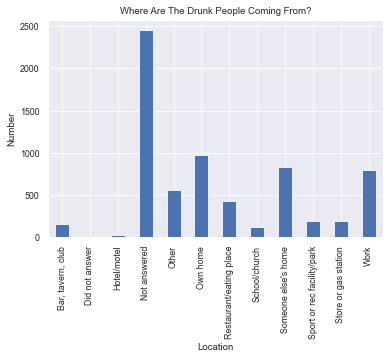

In [300]:
from2013 = dui_2013_df_no_zero.groupby("From Where_2013")

from2013_data = from2013["From Where_2013"].count()

ax1 = from2013_data.plot.bar(title="Where Were The Drunk People Coming From?")
ax1.set_xlabel("Location")
ax1.set_ylabel("Number")

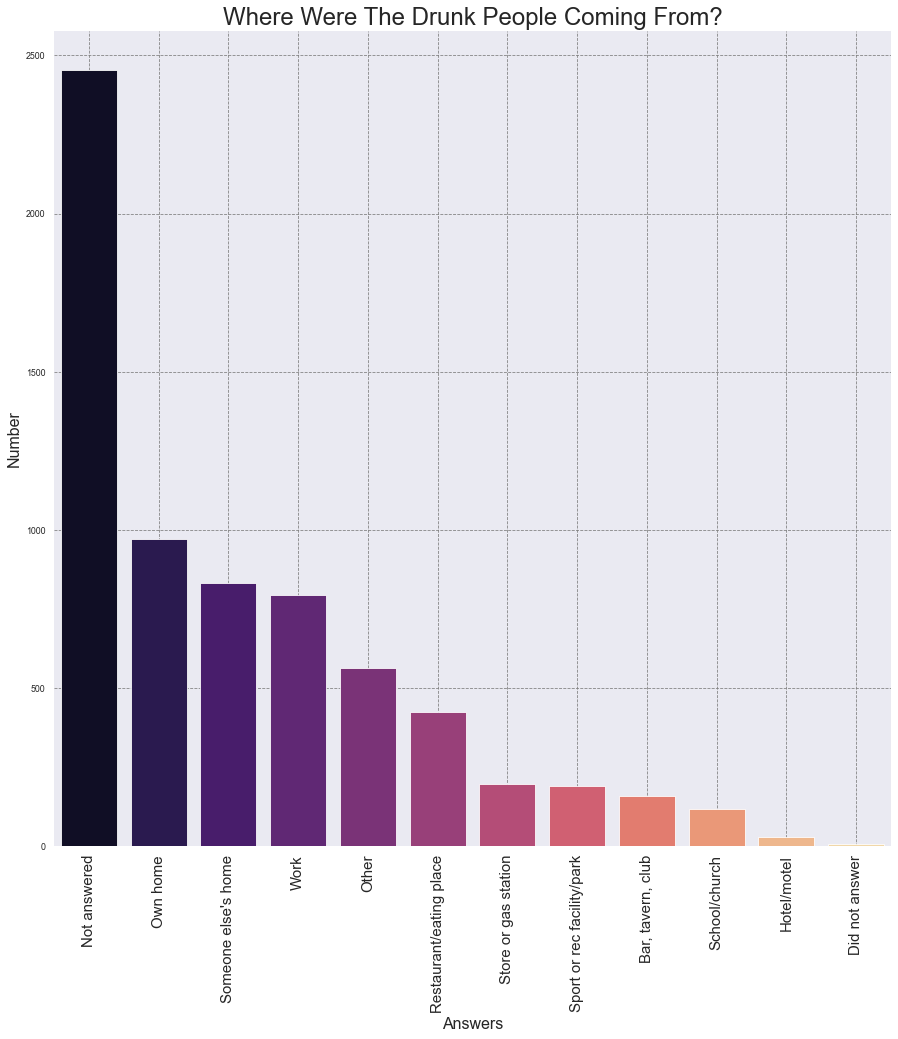

In [322]:
New_from = dui_2013_df_no_zero[["From Where_2013"]]
state_count_2013_dataF = New_from['From Where_2013'].value_counts().rename_axis('From Where_2013').reset_index(name='Number')
state_count_2013_dataF

f, ax = plt.subplots(figsize = (15,15))

ax = sns.barplot(x='From Where_2013', y='Number', data=state_count_2013_dataF,palette='magma')
plt.grid (b=True,which='major',axis='both',linestyle='--',color='grey')
plt.title('Where Were The Drunk People Coming From?', size=24)
plt.xlabel('Answers', size=16)
plt.ylabel('Number', size=16)
sns.despine(left = True, top = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, size = 15)

plt.show()

Text(0, 0.5, 'Number')

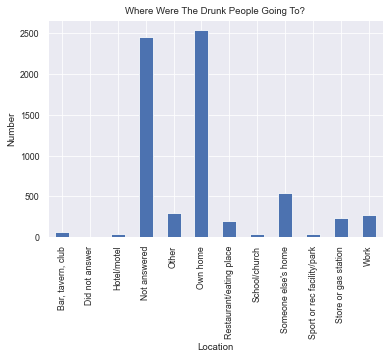

In [302]:
to2013 = dui_2013_df_no_zero.groupby("To Where_2013")

to2013_data = to2013["To Where_2013"].count()

ax2 = to2013_data.plot.bar(title="Where Were The Drunk People Going To?")
ax2.set_xlabel("Location")
ax2.set_ylabel("Number")

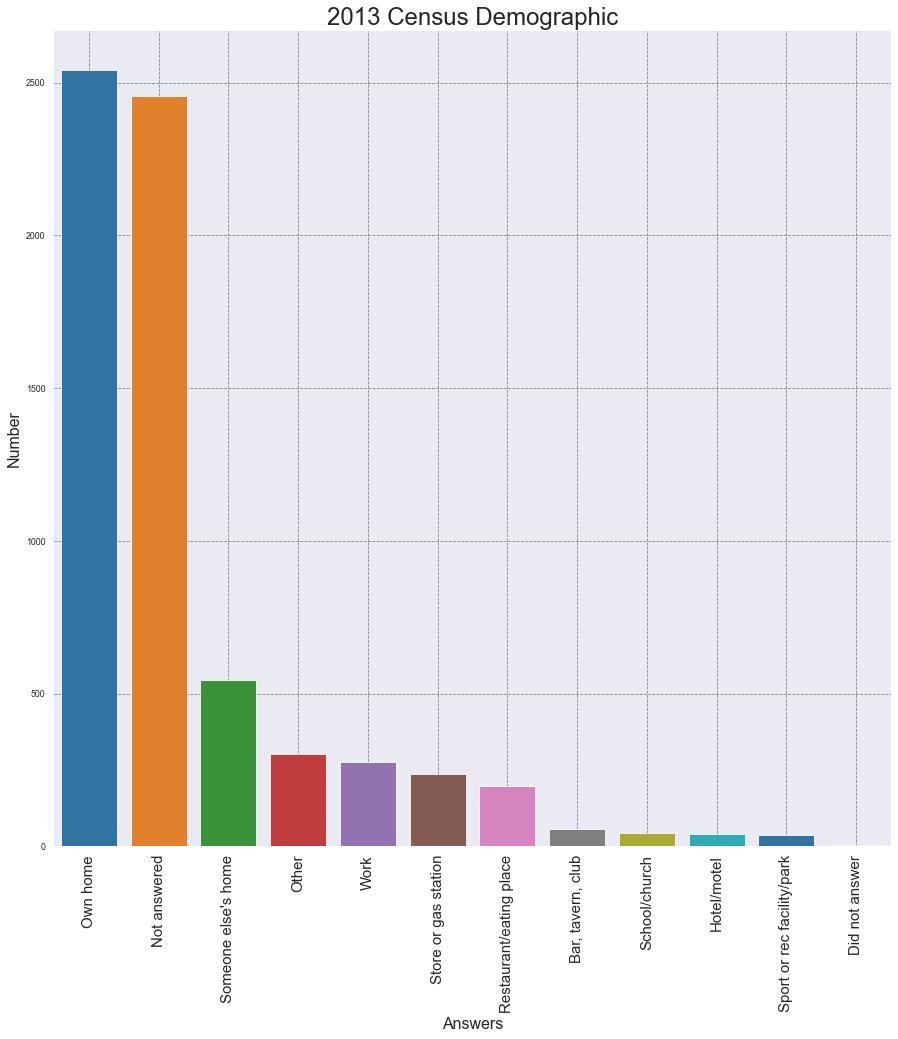

In [321]:
f, ax = plt.subplots(figsize = (15,15))

New_fromW = dui_2013_df_no_zero[["To Where_2013"]]
state_count_2013_dataW = New_fromW['To Where_2013'].value_counts().rename_axis('To Where_2013').reset_index(name='Number')
state_count_2013_dataW

ax = sns.barplot(x='To Where_2013', y='Number', data=state_count_2013_dataW,palette='tab10')
plt.grid (b=True,which='major',axis='both',linestyle='--',color='grey')
plt.title('"Where Were The Drunk People Going To?', size=24)
plt.xlabel('Answers', size=16)
plt.ylabel('Number', size=16)
sns.despine(left = True, top = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, size = 15)

plt.show()

-------------------------------------------------------------------------------------------------------------------------------

How many people who drove drunk told the truth about drinking that day?

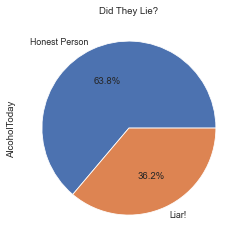

In [303]:
liar_data = liar_final.groupby("AlcoholToday")

liar_plot = liar_data["AlcoholToday"].count()

liar_plot.plot(kind="pie", y="AlcoholToday",title="Did They Lie?",autopct="%1.1f%%")

-------------------------------------------------------------------------------------------------------------------------------

Are the educated more likely to drink?

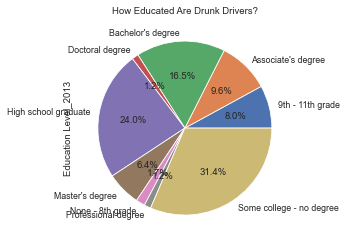

In [304]:
edu_df_clean1 = dui_2013_df_no_zero[dui_2013_df_no_zero["Education Level_2013"] != "Not answered"]

edu_df_clean2 = edu_df_clean1[edu_df_clean1["Education Level_2013"] != "Did not answer"]

edu_df = edu_df_clean2[edu_df_clean2["Education Level_2013"] != "None"]

edu_data = edu_df.groupby("Education Level_2013")

edu_plot = edu_data["Education Level_2013"].count()

edu_plot.plot(kind="pie", y="Education Level",title="How Educated Are Drunk Drivers?",autopct="%1.1f%%")

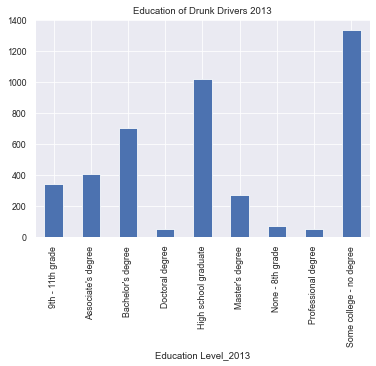

In [305]:
edu_plot.plot(kind="bar", x="Level of education", y="Number of DUI's",title="Education of Drunk Drivers 2013")

-------------------------------------------------------------------------------------------------------------------------------

What were the Drunk drivers driving?

In [306]:
vehicle_df_clean1 = dui_2013_df_no_zero[dui_2013_df_no_zero["Vehicle Type_2013"] != "Not answered"]

vehicle_df_clean2 = vehicle_df_clean1[vehicle_df_clean1["Vehicle Type_2013"] != "Other __________________________"]

vehicle_df_final = vehicle_df_clean2[vehicle_df_clean2["Vehicle Type_2013"] != "Unknown"]

vehicle_data = vehicle_df_final.groupby("Vehicle Type_2013")

vehicle_plot = vehicle_data["Vehicle Type_2013"].count()

vehicle_plot

Vehicle Type_2013
Car               3904
Minivan            268
Motorcycle          72
Pickup             725
SUV/ Crossover    1485
Van                 55
Name: Vehicle Type_2013, dtype: int64

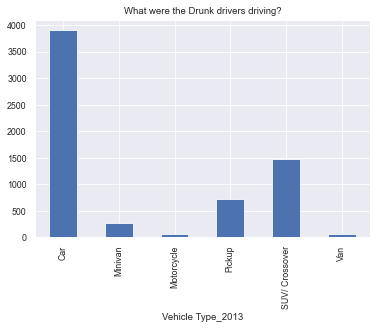

In [307]:
vehicle_plot.plot(kind="bar", x="Types of Vehicles", y="Number of Drivers",title="What were the Drunk drivers driving?")

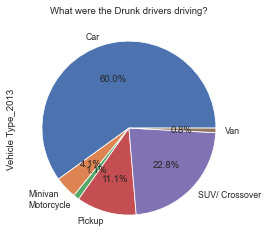

In [308]:
vehicle_plot.plot(kind="pie", y="Types of Vehicles",title="What were the Drunk drivers driving?",autopct="%1.1f%%")